## Scatter Plots
### skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')



In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
data = {
    'job_skills': ['python','sql','java','c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

df_sample = pd.DataFrame(data)

In [3]:
df_sample

,job_skills,skill_count,skill_pay
0,python,30,100
1,sql,25,90
2,java,20,80
3,c++,15,70
4,c#,10,60
5,javascript,5,50
6,html,4,40
7,css,3,30
8,php,2,20
9,ruby,1,10


<Axes: xlabel='skill_count', ylabel='skill_pay'>

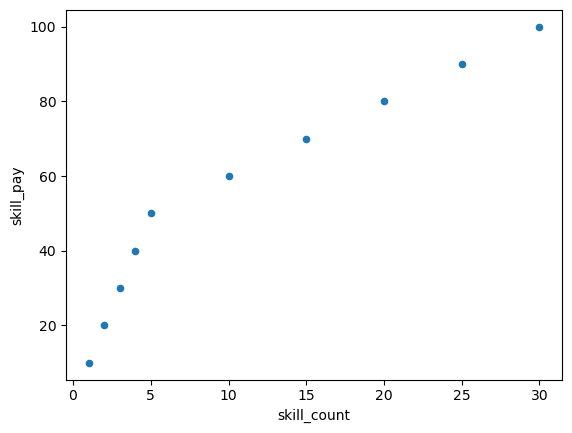

In [4]:
df_sample.plot(kind='scatter', x = 'skill_count', y = 'skill_pay')

In [5]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [7]:
df = df[df['job_title_short'] == 'Data Analyst']

# we are replacing the entire df here so not necessary to make a copy

In [8]:
# now we explode that df

df_exploded = df.explode('job_skills')

df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [32]:
df_exploded.groupby('job_skills').agg('median', 'size')

# this is the wrong way to groupby

,job_work_from_home,job_no_degree_mention,job_health_insurance,salary_year_avg,salary_hour_avg
job_skills,,,,,
airflow,0.0,0.0,0.0,111175.0,48.549999
airtable,0.0,0.0,0.0,90000.0,16.510000
alteryx,0.0,0.0,0.0,105000.0,38.750000
angular,0.0,0.0,0.0,109101.0,28.750000
angular.js,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...
wrike,0.0,0.0,0.0,75000.0,19.580000
wsl,0.0,0.0,0.0,NaN,NaN
xamarin,0.0,0.5,0.5,NaN,NaN


In [14]:
# the right way is by using a tuple:

df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'size')
)

,skill_count
job_skills,
airflow,2002
airtable,88
alteryx,4570
angular,376
angular.js,2
...,...
wrike,39
wsl,16
xamarin,2


In [17]:
# look at that output, beautiful! Now we cann add a median tuple for the median col:

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'size'),
    median_salary = ('salary_year_avg', 'median')
)

# AND BAM!
skill_stats

,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [19]:
skill_stats.sort_values(by = 'skill_count', ascending = False)

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
...,...,...
esquisse,1,NaN
suse,1,NaN
capacitor,1,NaN


In [21]:
# taking top 10

skill_stats = skill_stats.sort_values(by = 'skill_count', ascending = False).head(10)

skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


<Axes: xlabel='skill_count', ylabel='median_salary'>

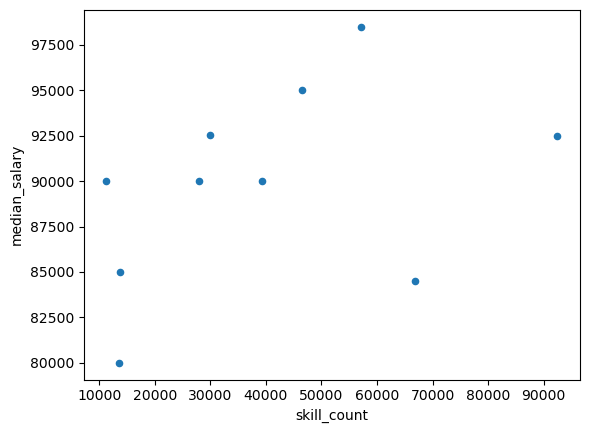

In [22]:
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')

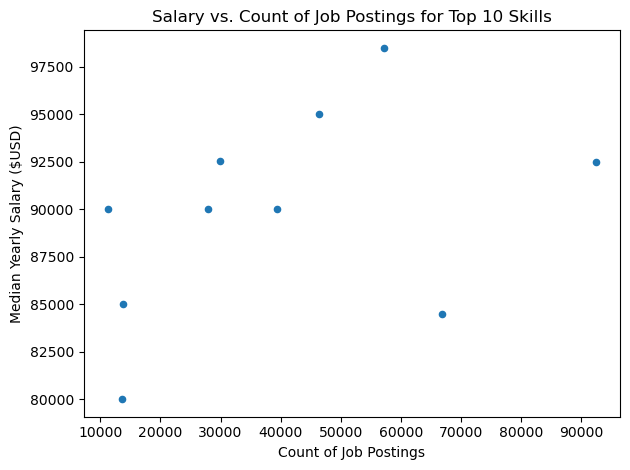

In [24]:
# cleaning it up

skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Count of Job Postings')
plt.tight_layout()
plt.show()

# not easy with matplotlib to annotate the scatter points- Seaborn would be ideal. But we can make a work-around for this (matplotlib.pyplot.text)

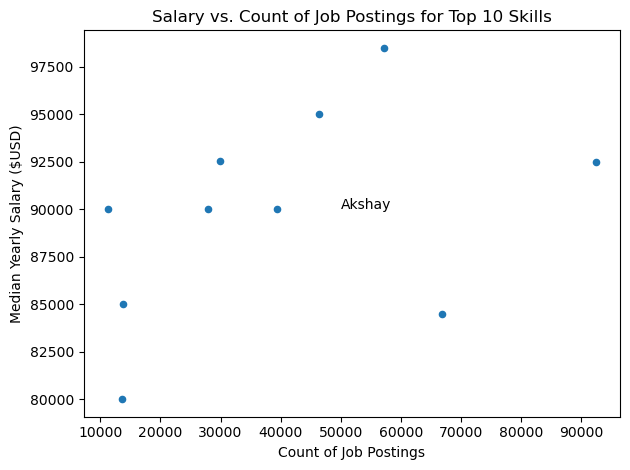

In [26]:
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Count of Job Postings')

# plt.text(x, y, s)
plt.text(50000, 90000, 'Akshay') # example: scatter point disappears- we need a better way

plt.tight_layout()
plt.show()

In [ ]:
# we can't spend time doing this for all datapoints so let's use a for loop

# skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
# plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
# plt.ylabel('Median Yearly Salary ($USD)')
# plt.xlabel('Count of Job Postings')
# plt.tight_layout()
# plt.show()

In [27]:
# let's design that for loop using skill_stats

skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


In [28]:
for i, txt in enumerate(skill_stats.index):
    print(i, txt) # to show a sample output

0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap


In [31]:
# modifying the for loop for our use case

# for i, txt in enumerate(skill_stats.index):
#     plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

# we can use this for loop to annotate the scatter points 

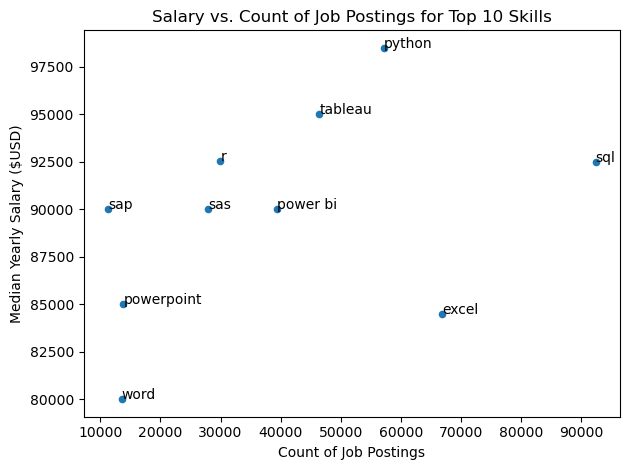

In [30]:
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Count of Job Postings')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.show()

# AND BAM!